## Семинар 8

# Тема: Логистическая регрессия своими руками для задач с двумя и тремя признаками

Имеется набор данных и у каждого объекта есть метка принадлежности к какому-то классу.
Необходимо предсказывать метку класса для объекта. Идея логистической регрессии состоит в том, чтобы предсказывать не метку класса, а вероятность принадлежности данного объекта к каждому из классов.

Рассмотрим алгоритм логистической регрессии для бинарной классификации, т.е. случая, когда различных классов всего 2. В этом случае задача алгоритма логистической регрессии очень похожа на задачу алгоритма линейной регрессии, рассмотренного ранее: модель должна подобрать коэффициенты $w_0, w_1, \dots, w_n$.

В начале мы делаем то же самое, что и в линейной регрессии. Мы вычисляем значение

$$z = w_0 + w_1 \cdot x_1 + \dots + w_m \cdot x_m.$$

Затем величина $z$ помещается в _сигмоидную функцию_:
$$\sigma(z) = \dfrac{1}{1 + e^{- z}}.$$

Сигмоидная функция используется для того, чтобы преобразовать число $z$ из промежутка $(- \infty, \infty)$ в число $\sigma(z)$ из промежутка $(0, 1)$. Причём, делается это так, что число $\sigma(z)$ можно теперь интерпретировать как вероятность. В нашем случае это будет вероятность принадлежности объекта $x$ классу 1. Соответственно, вероятность принадлежности объекта классу 0 будет равна $1 - \sigma(z)$.

Таким образом

$$P\left(y=1|x\right) = \sigma(z),$$

$$P\left(y=0|x\right) = 1 - \sigma(z),$$

Построим функцию правдоподобия как

$$Loss(x) = \arg \max \limits_z  \prod \limits_{i=0}^{n} P\left(y=y_i|x = x_i\right)$$

Для построения максимума удобнее использовать ее логарифм:

Алгоритм логистической регрессии минимизирует функцию потерь $logLoss$:

$$logLoss(x) =-\frac{1}{n}\sum\limits_{i=0}^{n}  (y_i \cdot \operatorname{ln} (p_i) + (1 - y_i) \cdot \operatorname{ln} (1 - p_i)).$$

Здесь $y_i$ - правильный ответ на объекте $x_i$ (0 или 1), а $p_i$ - вычисленная алгоритмом вероятность принадлежности объекта $x$ классу 1.

Для поиска минимума может быть применен поиск минимума при помощи градиентного спуска.

Импортируем необходимые библиотеки:

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import make_blobs

### Генерация данных для задачи регрессии

In [3]:
X, y = make_blobs(n_samples = 50, centers = 2,
               cluster_std = 1.5, n_features = 2,
                  random_state=42)

Выведим первые пять строк признаков:

In [4]:
X[:5]

array([[ 4.58613978,  4.32013517],
       [-3.41175754, 11.7927034 ],
       [-4.5014767 ,  9.30957798],
       [-2.40790532,  6.87716385],
       [-4.0284443 ,  9.48565713]])

Выведим значения целевой переменной:

In [5]:
y

array([1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0,
       0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 1, 0])

Визуализируем сгенерироавнные данные на диаграмме рассеивания, подкрасив классы разными цветами.

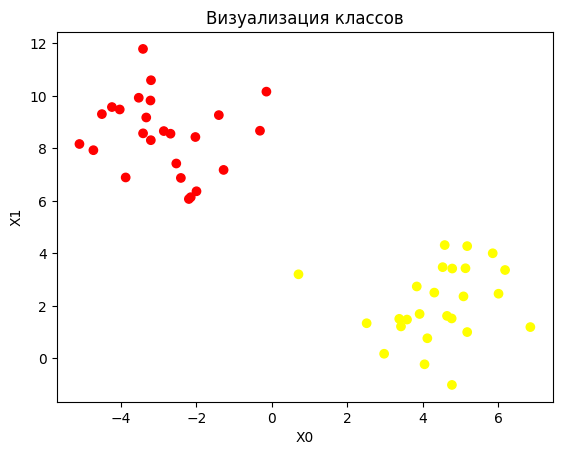

In [6]:
plt.scatter(X[:, 0], X[:, 1],  c=y, cmap='autumn')
plt.xlabel('X0')
plt.ylabel('X1')
plt.title("Визуализация классов")
plt.show()

### 1. Сгенерируйте данные и значения целевой переменной для задачи классификации с 2 признаками и 100 наблюдениями. Представьте признаки в виде датафрейма, выведите его первые 10 строк и описательную статистику. Целевую переменную представьте в виде серии и выведите количество элементов в каждом классе.
Указание: Для этого воспользуйтесь [make_blobs](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_blobs.html), задав параметры: число строк n_samples=100, число признаков n_features=2, количество классов centers = 2, стандартное отклонение групп точек cluster_std = 0.7 (отвечает за удалённость друг от друга классов), а также фиксируем воспроизводимость случайных данных random_state=0.

In [7]:
X, y = make_blobs(n_samples = 100, centers = 2,
               cluster_std = 0.7, n_features = 2,
                  random_state=0)

In [8]:
X[:5]

array([[3.56953269, 1.83323322],
       [1.25203946, 0.59118963],
       [0.09931333, 4.84803058],
       [0.35482006, 2.9172298 ],
       [2.88688838, 1.11952349]])

In [9]:
y

array([1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0,
       1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1])

In [10]:
df = pd.DataFrame(X, columns=['Feature 1', 'Feature 2'])
target_series = pd.Series(y)
df.head(10)

,Feature 1,Feature 2
0,3.569533,1.833233
1,1.252039,0.591190
2,0.099313,4.848031
3,0.354820,2.917230
4,2.886888,1.119523
5,1.302234,3.228417
6,1.008301,4.172759
7,3.401327,1.934024
8,0.705141,4.092175
9,1.492881,0.414979


In [11]:
df.describe()

,Feature 1,Feature 2
count,100.000000,100.000000
mean,1.501012,2.685094
std,0.894884,1.797777
min,-0.810823,-0.658719
25%,1.002131,1.110792
50%,1.500939,2.587714
75%,2.033131,4.354567
max,3.723469,5.669330


In [12]:
class_counts = target_series.value_counts()
class_counts

,count
1,50
0,50


### 2. Визуализируйте сгенерироавнные данные на диаграмме рассеивания, подкрасив классы разными цветами. Подпишите классы.

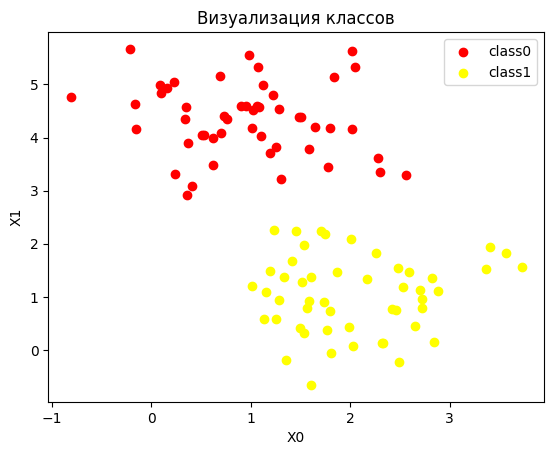

In [13]:
plt.scatter(X[:, 0][y == 0], X[:, 1][y == 0],  c = 'red', label = 'class0')
plt.scatter(X[:, 0][y == 1], X[:, 1][y == 1],  c = 'yellow', label = 'class1')
plt.xlabel('X0')
plt.ylabel('X1')
plt.title("Визуализация классов")
plt.legend()
plt.show()

### 3. Напишите функцию сигмоида $\sigma(z) = \dfrac{1}{1 + e^{- z}}.$ Вычислите её значения на случайном векторе длины 100.

In [14]:
def sigmoid(z):
    return 1/(1 + np.exp(-z))

In [15]:
random_vector = np.random.randn(100)

In [16]:
sigmoid(random_vector)

array([0.58061431, 0.57597639, 0.43018509, 0.73769111, 0.36894435,
       0.27563696, 0.72155921, 0.81332262, 0.45333057, 0.16202654,
       0.41795605, 0.45724613, 0.35332054, 0.76126789, 0.27899033,
       0.70484404, 0.51844635, 0.82329642, 0.89074708, 0.54217951,
       0.75991659, 0.67848745, 0.46250537, 0.79367364, 0.16420124,
       0.19687576, 0.22130336, 0.56403339, 0.41431225, 0.22387115,
       0.69396839, 0.38575618, 0.46816955, 0.24858457, 0.62243736,
       0.32060802, 0.80819261, 0.62028205, 0.2951548 , 0.6066688 ,
       0.56103852, 0.50032081, 0.46005783, 0.77036336, 0.65411755,
       0.48148142, 0.42627835, 0.43432024, 0.69522648, 0.88211354,
       0.17605355, 0.66874311, 0.57238865, 0.32524049, 0.17103983,
       0.67691287, 0.37197669, 0.73615868, 0.13620005, 0.28707492,
       0.63022278, 0.39053838, 0.78601082, 0.30770209, 0.12335842,
       0.50057486, 0.14362326, 0.05687082, 0.67697115, 0.67038788,
       0.31656508, 0.65700009, 0.25098646, 0.45715415, 0.62067

### 4. Напишите функцию, вычисляющую предсказание вероятности того, что значение принадлежит классу единица в случае двух признаков $\vec{p} =\sigma(w_0 + w_1 \vec{x}_1+ w_2 \vec{x}_2)$. Назовите её predict_proba. Вычислите её значения на сгенерированных данных X в случайной точке $w$.

In [17]:
def predict_proba(w, X):
        return sigmoid(w[0] + w[1]*X[:,0] + w[2]*X[:,1])

In [18]:
predict_proba(random_vector, X)

array([0.71161669, 0.63241384, 0.26755778, 0.40466793, 0.70987792,
       0.45428939, 0.36845977, 0.69495745, 0.35228061, 0.66058061,
       0.33384916, 0.66159268, 0.324539  , 0.31212297, 0.61942134,
       0.73643838, 0.76069394, 0.34098776, 0.62507603, 0.60617837,
       0.34826774, 0.3399945 , 0.55978156, 0.26648566, 0.70022942,
       0.33439044, 0.66938242, 0.28198801, 0.36448123, 0.62372743,
       0.7309559 , 0.34734554, 0.61192485, 0.7315358 , 0.56101427,
       0.4262066 , 0.63450952, 0.58678442, 0.47546524, 0.57353126,
       0.37031565, 0.36679883, 0.20831119, 0.40987934, 0.51711743,
       0.64867699, 0.71582975, 0.71035306, 0.263853  , 0.28649915,
       0.69251241, 0.59211615, 0.34537129, 0.34341791, 0.54669398,
       0.34584328, 0.52085275, 0.64596406, 0.69786675, 0.75982618,
       0.60659618, 0.41289837, 0.26453743, 0.68274366, 0.30137825,
       0.55379211, 0.34112892, 0.50180446, 0.69195492, 0.43681259,
       0.41331109, 0.68153725, 0.71597082, 0.38828215, 0.39648

### 5. Напишите функцию ошибки (logLoss) логистической регрессии.
Указание: $logLoss(\vec y, \vec p) = -\frac{1}{n}\sum_{i=1}^{n} (y_i \ln (p_i) + (1 - y_i) \ln (1 - p_i))$, где $p_i = \sigma(w_0 + w_1 {x}_{i1}+ w_2 {x}_{i2}).$ Используйте написанную функцию predict_proba.

In [19]:
def logLoss(w, X, y):
    n = X.shape[0]
    p = predict_proba(w, X)
    return -1/n * np.sum(y * np.log(p) + (1-y)*np.log(1-p))

In [20]:
logLoss(random_vector, X, y)

0.43723014086361434

### 6. Реализуйте функцию, которая вычисляет градиент функции ошибки логистической регрессии с двумя признаками.
Указание: $$ \frac{\partial }{\partial w_0}logLoss(\vec w, X , \vec y) =\frac{1}{n}\sum_{i=1}^{n} (\sigma(w_0 + w_1 x_{i 1}+ w_2 x_{i 2}) - {y}_i)$$
$$\frac{\partial }{\partial w_1}logLoss(\vec w, X, \vec y) =\frac{1}{n}\sum_{i=1}^{n} (\sigma(w_0 + w_1 x_{i 1}+ w_2 x_{i 2}) - {y}_i){x}_{i 1}$$
$$\frac{\partial }{\partial w_2}logLoss(\vec w, X, \vec y) =\frac{1}{n}\sum_{i=1}^{n} (\sigma(w_0 + w_1 x_{i 1}+ w_2 x_{i 2}) - {y}_i){x}_{i 2}$$

In [41]:
def gradient_logLoss(w, X, y):
    n = X.shape[0]
    p = predict_proba(w, X)

    grad_1 = 1/n * np.sum(p - y)
    grad_2 = 1/n * np.sum((p - y) * X[:,0])
    grad_3 = 1/n * np.sum((p - y) * X[:,1])

    return np.array([grad_1, grad_2, grad_3])

In [43]:
gradient_logLoss(random_vector, X, y)

array([ 0.00709083, -0.14396164,  0.56467017])

### 7. Создайте класс, реализующий модель логистической регрессии. Найдите оптимальные значения коэффициентов разделяющей гиперплоскости.
Указание: Необходимо создать класс, реализующий метод градиентного спуска для logLoss функции.
Воспользуйтесь для этого классом GradientDiscent, написанный в предыдущих ноутбуках, добавив туда gradient_logLoss, sigmoid и predict_proba.

In [36]:
class GradientDiscent():
    def __init__(self, max_iter):
        self.w = None
        self.max_iter_ = max_iter

    def sigmoid(self, z):
        return 1/(1 + np.exp(-z))

    def predict_proba(self,w, X):
        return self.sigmoid(self.w[0] + self.w[1]*X[:,0] + self.w[2]*X[:,1])

    def gradient_F(self, X, y):
        n = X.shape[0]
        p = self.predict_proba(self.w, X)

        grad_1 = 1/n * np.sum(p - y)
        grad_2 = 1/n * np.sum((p - y) * X[:,0])
        grad_3 = 1/n * np.sum((p - y) * X[:,1])

        return np.array([grad_1, grad_2, grad_3])

    def GD(self, a, b, w_start, learning_rate=100):
        self.w = w_start

        for _ in range(self.max_iter_):
            self.w = self.w - learning_rate *self.gradient_F(a, b)
        assert (-1e+06 < self.w).all() and (self.w < 1e+06).all(), "Расходимость: слишком большой learning_rate, либо неудачно выбрана начальная точка, либо минимум не достигается"
        assert (-1e-04 < self.gradient_F(a, b)).all() and (self.gradient_F(a, b) < 1e-04).all(), "Недостаточно шагов градиентного спуска"

    def fit(self, a, b):
        w_start = np.zeros(3)
        self.GD(a, b, w_start)

In [37]:
gd = GradientDiscent(1000)
gd.fit(X, y)

In [38]:
gd.w

array([ 87.84969725,  34.8622397 , -55.66336635])

### 8. Напечатайте уравнение линии регрессии, полученной в результате применения модели логистической регрессии к данным X, y.
Указание: Используйте print. Уравнение прямой должно иметь вид $w_0 + w_1 x_1  + w_2 x_2 = 0$. Выводите коэффициенты линии регрессии с точностью два знака после запятой. Учтите то, что эти коэффициенты могут быть и отрицательными.

In [39]:
res = f'{gd.w[0]:.2f}'
for i in range(1, len(gd.w)):
    if gd.w[i] > 0:
        res += f' + {gd.w[i]:.2f} * x{i} '
    else:
        res += f'{gd.w[i]:.2f} * x{i}'
print(f'{res} = 0')

87.85 + 34.86 * x1 -55.66 * x2 = 0


### 9. Добавьте в класс GradientDiscent метод predict, осуществляющий предсказание. Назовите созданный класс Logistic_Regression. Сделайте предсказание на X.
Указание: Предсказания принадлежности к классу вычисляются так: если вероятность принадлежать классу единица $\sigma(w_0 + w_1 x) > 1/2$, то присваиваем метку класса - единица, в противном случае метка класса - нуль.

In [49]:
class Logistic_Regression():
    def __init__(self, max_iter):
        self.w = None
        self.max_iter_ = max_iter

    def sigmoida(self, z):
        return 1/(1 + np.exp(-z))

    def predict_proba(self, X):
        return self.sigmoida(self.w[0] + self.w[1]*X[:, 0] + self.w[2]*X[:, 1])

    def predict(self, X):
        y_pred = self.predict_proba(X) > 0.5
        return np.where(y_pred==False, 0, y_pred)

    def gradient_F(self, X, y):
        n = X.shape[0]
        p = self.predict_proba(X)

        grad_1 = 1/n * np.sum(p - y)
        grad_2 = 1/n * np.sum((p - y) * X[:, 0])
        grad_3 = 1/n * np.sum((p - y) * X[:, 1])

        return np.array([grad_1, grad_2, grad_3])

    def GD(self, a, b, w_start, learning_rate=100):
        self.w = w_start

        for _ in range(self.max_iter_):
            self.w = self.w - learning_rate *self.gradient_F(a, b)
        assert (-1e+06 < self.w).all() and (self.w < 1e+06).all(), "Расходимость: слишком большой learning_rate, либо неудачно выбрана начальная точка, либо минимум не достигается"
        assert (-1e-04 < self.gradient_F(a, b)).all() and (self.gradient_F(a, b) < 1e-04).all(), "Недостаточно шагов градиентного спуска"

    def fit(self, a, b):
        w_start = np.zeros(3)
        self.GD(a, b, w_start)

In [50]:
lr = Logistic_Regression(1000)
lr.fit(X, y)

In [51]:
lr.predict(X)

array([1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0,
       1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1])

### 10. Постройте найденную линию разделения и диаграмму рассеивания данных на одном графике двумя способами: как уравнение прямой и как линия нулевого уровня плоскости.
Указание: Уравнение линии разделения есть $w_0 + w_1 x_{1}+ w_2 x_{2} = 0.$

1) Прямая $x_{2} = -(w_0 + w_1 x_{1})/ w_2.$
           
2) Линия уровня поверхности $z(x_1, x_2) = w_0 + w_1 x_{1}+ w_2 x_{2}$

In [52]:
X0_line = np.linspace(X[:,0].min(), X[:,0].max(), 100)
X1_line = np.linspace(X[:,1].min(), X[:,1].max(), 100)

In [53]:
x1_grid, x2_grid = np.meshgrid(X0_line, X1_line)
z = lr.w[0] + lr.w[1] * x1_grid + lr.w[2] * x2_grid

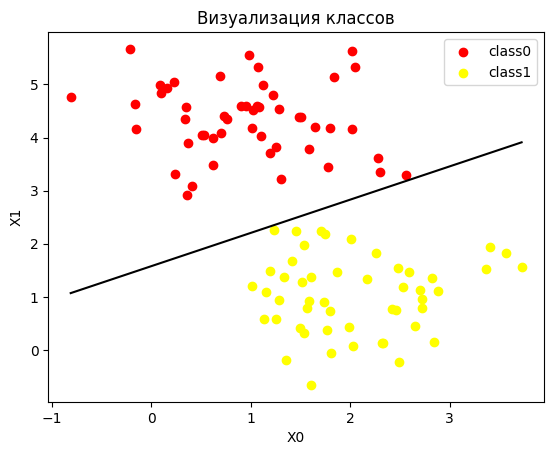

In [54]:
plt.scatter(X[:, 0][y == 0], X[:, 1][y == 0],  c = 'red', label = 'class0')
plt.scatter(X[:, 0][y == 1], X[:, 1][y == 1],  c = 'yellow', label = 'class1')
plt.plot(X0_line, -(lr.w[0] + lr.w[1] * X0_line) / lr.w[2], c = 'black')
plt.xlabel('X0')
plt.ylabel('X1')
plt.title("Визуализация классов")
plt.legend()
plt.show()

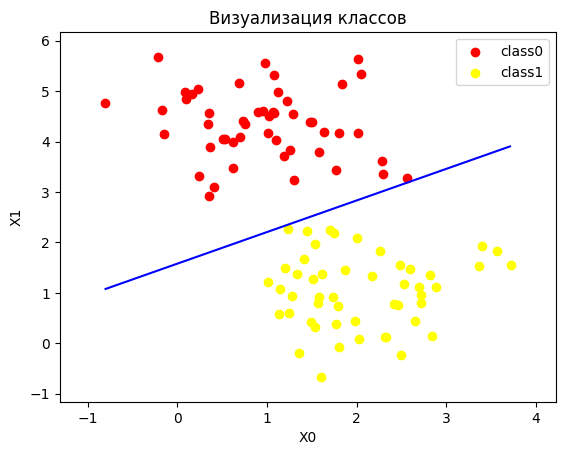

In [55]:
plt.scatter(X[:, 0][y == 0], X[:, 1][y == 0],  c = 'red', label = 'class0')
plt.scatter(X[:, 0][y == 1], X[:, 1][y == 1],  c = 'yellow', label = 'class1')
plt.contour(x1_grid, x2_grid, z, levels = 0, colors='blue')
plt.xlabel('X0')
plt.ylabel('X1')
plt.title("Визуализация классов")
plt.legend()
plt.xlim(X[:,0].min() - 0.5, X[:,0].max() + 0.5)
plt.ylim(X[:,1].min() - 0.5, X[:,1].max() + 0.5)
plt.show()

### 11. Создайте новое наблюдение, например, взяв медианное значение по каждому столбцу X. Сделайте предсказание на нём.
Указание: Обртите внимание, что метод predict принимает только двумерные numpy-массивы.

In [56]:
new_observation = np.median(X, axis=0).reshape(1, -1)
lr.predict(new_observation)

array([0])

### 12.Визуализируйте области разделения на классы и диаграмму рассеивания данных на одном графике. Изобразите точкой предсказанное значение. Убедитесь в том, что оно расположено в нужной области.
Указание: Области разделения на классы визуализируйте, используя [contourf](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.contourf.html).

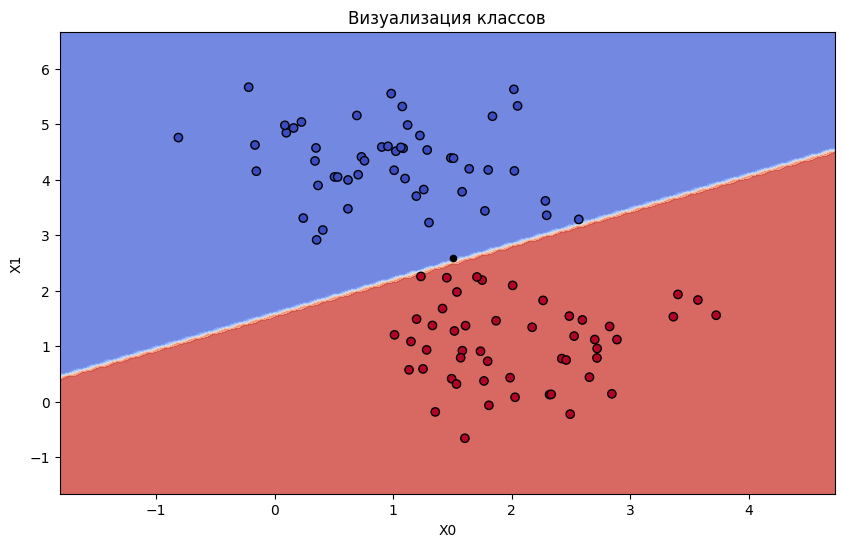

In [57]:
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))

Z = lr.predict_proba(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, alpha=0.8, cmap='coolwarm')
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k', cmap='coolwarm', marker='o')
plt.scatter(new_observation[0][0], new_observation[0][1], color='black', s=20)
plt.xlabel('X0')
plt.ylabel('X1')
plt.title("Визуализация классов")
plt.show()

### 13. Сгенерируйте данные и значения целевой переменной для задачи классификации с 3 признаками и 100 наблюдениями. Представьте признаки в виде датафрейма и выведите его первые 10 строк и описательную статистику. Целевую переменную представьте в виде серии и выведите количество элементов в каждом классе.

In [58]:
X, y = make_blobs(n_samples = 100, centers=2,
                  n_features = 3, random_state=0)
data2 = pd.DataFrame(X, columns=['$X_1$', '$X_2$', '$X_3$'])
data2.head(10)

,$X_1$,$X_2$,$X_3$
0,1.506507,-2.572157,4.129028
1,2.024300,-2.606836,1.770414
2,1.287757,-2.179313,2.526929
3,2.115671,3.068962,2.457609
4,0.986086,-1.837790,3.015282
5,2.919891,3.890168,1.307813
6,0.855407,-2.482849,2.571900
7,0.538196,3.050992,2.832758
8,1.363173,3.792982,0.874635
9,0.291460,3.432990,1.476418


In [59]:
data2.describe()

,$X_1$,$X_2$,$X_3$
count,100.000000,100.000000,100.000000
mean,0.977571,1.495262,2.356587
std,1.012135,3.177661,1.069251
min,-1.325739,-4.299497,-0.497722
25%,0.369088,-1.448199,1.524344
50%,0.954507,1.813217,2.282029
75%,1.601782,4.453488,3.039135
max,3.359415,6.254563,5.177191


In [60]:
y_series2 = pd.Series(y)
y_series2.value_counts()

,count
1,50
0,50


### 14. Визуализируйте данные с тремя признаками на пространственной диаграмме рассеивания. Поверните график на нужный угол так, чтобы было видно, что данные линейно разделимы.

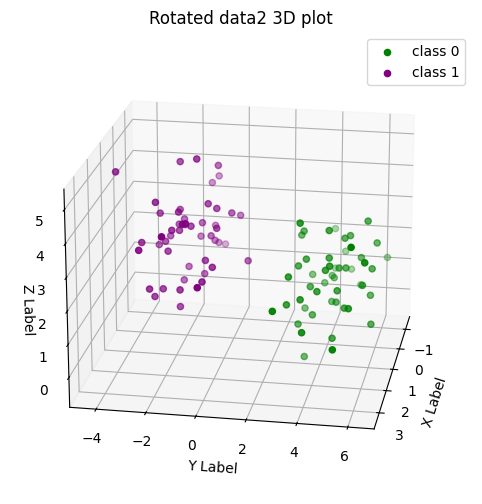

In [61]:
figure = plt.figure(figsize=(8, 6))
ax = figure.add_subplot(projection='3d')
ax.scatter(X[:, 0][y==0], X[:, 1][y==0], X[:, 2][y==0], color='green', label='class 0')
ax.scatter(X[:, 0][y==1], X[:, 1][y==1], X[:, 2][y==1], color='purple', label='class 1')

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label', labelpad=-3)
ax.set_title('Rotated data2 3D plot')

ax.view_init(elev=20, azim=10)

ax.legend()
plt.show()

### 15. Напишите функцию, вычисляющую предсказание вероятности того, что значение принадлежит классу единица в случае, когда три признака. Назовите её predict_proba. Вычислите её значения на сгенерированных данных X в случайной точке $w$.
Указание:  $\vec{p} =\sigma(w_0 + w_1 \vec{x}_1+ w_2 \vec{x}_2)$

In [65]:
def predict_proba2(w, X):
        return sigmoid(w[0] + w[1]*X[:, 0] + w[2]*X[:, 1] + w[3]*X[:, 2])

In [66]:
predict_proba2((0, 1, 3, 5), X)

array([0.99999946, 0.95503489, 0.99937956, 1.        , 0.99997378,
       1.        , 0.99810447, 1.        , 0.99999996, 0.99999998,
       0.99976313, 1.        , 1.        , 1.        , 0.96118735,
       1.        , 1.        , 1.        , 1.        , 0.99750573,
       0.92746365, 1.        , 0.99999467, 0.9997038 , 0.99999863,
       0.99999998, 0.99999878, 0.99999994, 0.73618326, 1.        ,
       0.92466594, 0.99995365, 1.        , 1.        , 1.        ,
       0.99999901, 0.99999999, 1.        , 1.        , 1.        ,
       0.99989377, 0.99999999, 0.99999999, 0.99997356, 1.        ,
       0.99999991, 0.99999572, 0.99986866, 0.99999474, 1.        ,
       0.99999999, 0.99995013, 0.99997294, 1.        , 0.99999869,
       0.99999997, 0.9223689 , 0.99999957, 1.        , 1.        ,
       0.99977802, 1.        , 1.        , 0.99999996, 0.99456943,
       1.        , 1.        , 1.        , 0.99998088, 0.99999999,
       1.        , 1.        , 1.        , 1.        , 0.99999

### 16. Напишите функцию gradient_logLoss, которая вычисляет градиент функции ошибки логистической регрессии с тремя признаками.

Указание: $$ \frac{\partial }{\partial w_0}loss(\vec w, X , \vec y) =\frac{1}{n}\sum_{i=1}^{n} (\sigma(w_0 + w_1 x_{i 1}+ w_2 x_{i 2}+ w_3 x_{i 3}) - {y}_i)$$
$$\frac{\partial }{\partial w_1}loss(\vec w, X, \vec y) =\frac{1}{n}\sum_{i=1}^{n} (\sigma(w_0 + w_1 x_{i 1}+ w_2 x_{i 2}) - {y}_i){x}_{i 1}$$
$$\frac{\partial }{\partial w_2}loss(\vec w, X, \vec y) =\frac{1}{n}\sum_{i=1}^{n} (\sigma(w_0 + w_1 x_{i 1}+ w_2 x_{i 2}) - {y}_i){x}_{i 2}$$
$$\frac{\partial }{\partial w_3}loss(\vec w, X, \vec y) =\frac{1}{n}\sum_{i=1}^{n} (\sigma(w_0 + w_1 x_{i 1}+ w_2 x_{i 2}) - {y}_i){x}_{i 3}$$

In [67]:
def gradient_logLoss2(w, X, y):
    n = X.shape[0]
    p = predict_proba2(w, X)

    grad_1 = 1/n * np.sum(p - y)
    grad_2 = 1/n * np.sum((p - y) * X[:, 0])
    grad_3 = 1/n * np.sum((p - y) * X[:, 1])
    grad_4 = 1/n * np.sum((p - y) * X[:, 2])

    return np.array([grad_1, grad_2, grad_3, grad_4])

### 17. Постройте модель логистической регрессии с тремя признаками в виде класса, назовите его Logistic_Regression_dim3.  Обучите построенную модель и выведите оптимальные параметры гиперплоскости.
Указание: Преобразуйте класс Logistic_Regression_dim2 так, чтобы он мог быть применим к данным с тремя признаками. Замените нужным образом методы gradient_F и predict_proba, а в fit стартовую точку возьмите, состоящую из четырёх нулей.

In [68]:
class Logistic_Regression_dim3():
    def __init__(self, max_iter, learning_rate):
        self.w = None
        self.max_iter_ = max_iter
        self.learning_rate = learning_rate

    def sigmoida(self, z):
        return 1/(1 + np.exp(-z))

    def predict_proba2(self, X):
        return self.sigmoida(self.w[0] + self.w[1]*X[:, 0] + self.w[2]*X[:, 1] + self.w[3]*X[:, 2])

    def predict(self, X):
        y_pred = self.predict_proba2(X) > 0.5
        return np.where(y_pred==False, 0, y_pred)

    def gradient_F(self, X, y):
        n = X.shape[0]
        p = self.predict_proba2(X)

        grad_1 = 1/n * np.sum(p - y)
        grad_2 = 1/n * np.sum((p - y) * X[:, 0])
        grad_3 = 1/n * np.sum((p - y) * X[:, 1])
        grad_4 = 1/n * np.sum((p - y) * X[:, 2])

        return np.array([grad_1, grad_2, grad_3, grad_4])

    def GD(self, a, b, w_start):
        self.w = w_start

        for _ in range(self.max_iter_):
            self.w = self.w - self.learning_rate *self.gradient_F(a, b)
        assert (-1e+06 < self.w).all() and (self.w < 1e+06).all(), "Расходимость: слишком большой learning_rate, либо неудачно выбрана начальная точка, либо минимум не достигается"
        assert (-1e-04 < self.gradient_F(a, b)).all() and (self.gradient_F(a, b) < 1e-04).all(), "Недостаточно шагов градиентного спуска"

    def fit(self, a, b):
        w_start = np.zeros(4)
        self.GD(a, b, w_start)

In [69]:
logistic_model = Logistic_Regression_dim3(10000, 100)
logistic_model.fit(X, y)

<ipython-input-68-24cdd603bc5d>:8: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-z))


In [70]:
logistic_model.w

array([  17.23865666,   -1.82080718, -136.982727  ,   54.26692818])

### 18. Визуализируйте плоскость разделения на классы и диаграмму рассеивания на одном пространственном графике. Поверните график на нужный угол так, чтобы было видно, что данные разделены плоскостью.

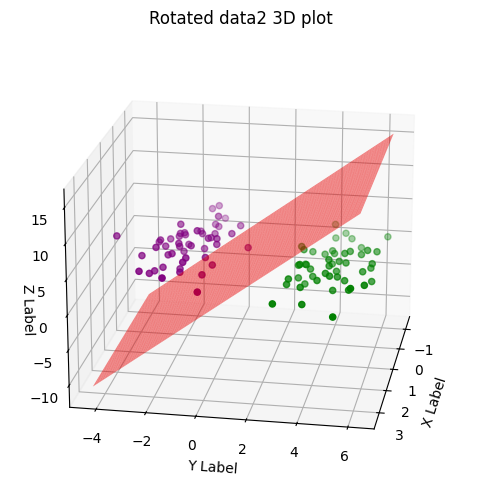

In [71]:
xx, yy = np.meshgrid(np.linspace(X[:, 0].min(), X[:, 0].max(), 100),
                     np.linspace(X[:, 1].min(), X[:, 1].max(), 100))
zz = (-logistic_model.w[0] - logistic_model.w[1] * xx - logistic_model.w[2] * yy) / logistic_model.w[3]

figure = plt.figure(figsize=(8, 6))
ax = figure.add_subplot(projection='3d')
ax.scatter(X[:, 0][y==0], X[:, 1][y==0], X[:, 2][y==0], color='green', label='class 0')
ax.scatter(X[:, 0][y==1], X[:, 1][y==1], X[:, 2][y==1], color='purple', label='class 1')

ax.plot_surface(xx, yy, zz, alpha=0.5, color='red', label='Decision Boundary')

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label', labelpad=-3)
ax.set_title('Rotated data2 3D plot')

ax.view_init(elev=20, azim=10)

# ax.legend()
plt.show()